### Question 1:

This is the maze we want to solve:


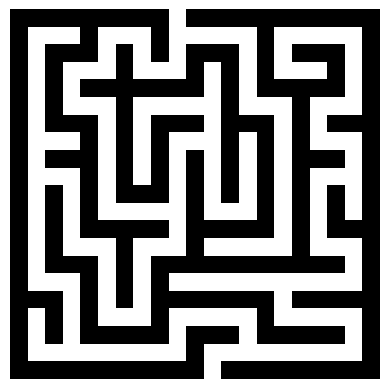

In [320]:
import PIL
import numpy as np
import matplotlib.pyplot as mp
import random

# Open the maze image and assign the width and height
maze = Image.open('maze-2.png').convert('L')
w, h = maze.size

# Ensure all black pixels are 0 and all white pixels are 1
binary = maze.point(lambda p: p > 128 and 1)

# Resize to ensure each cell takes up a single element in the array
compact_maze = binary.resize((w // 10, h // 10), Image.NEAREST)
w, h = compact_maze.size

# Convert to Numpy array
maze = np.array(compact_maze)
visited = np.zeros((21,21))
print("This is the maze we want to solve:")
mp.imshow(maze, cmap='gray')
mp.axis('off')
mp.show()

#### Backtracking Method

In [ ]:
direction = "DLRU"
y = [1, 0, 0, -1]
x = [0, -1, 1, 0]

def Clear(maze, row, col, size):
    return 0 <= row < size and 0 <= col < size and maze[row][col] == 1

def Backtrack(maze, row, col, size, ans, path, visited):
    if row == size-1 and maze[row][col] == 1:
        ans.append(", ".join(path))
        return
    
    maze[row][col] = 0
    visited[row][col] = 2
    for i in range(4):
        next_row = row + y[i]
        next_col = col + x[i]
        if Clear(maze, next_row, next_col, size):
            path += direction[i]
            Backtrack(maze, next_row, next_col, size, ans, path, visited)
            path = path[:-1]

    maze[row][col] = 1  

#### Las Vegas Method

In [ ]:
def LasVegas(maze, row, col, size, ans, path, visited):
    steps = 0
    success = False
    while success == False or steps <= 400:
        i = random.randrange(0, 4)
        next_row = row + y[i]
        next_col = col + x[i]
        if Clear(maze, next_row, next_col, size):
            visited[next_row][next_col] = 2
            path.append(direction[i])
            row = next_row
            col = next_col
         
        if row == size - 1 and maze[row][col] == 1:
            ans.append(", ".join(path))
            success = True
            return(ans)
        steps = steps + 1
    return None

#### Driver Code

In [ ]:
# Setup conditions for the maze solver functions
maze = np.array(compact_maze)
size = len(maze)
result = []
path = []

# Algorithm to select maze solver method via user input
method = input("Would you like to solve the maze using a backtracking or a Las Vegas method? ") 
check = False
while check == False:
    if method == "Backtracking":
        Backtrack(maze, 0, 9, size, result, path, visited)
        check = True
    elif method == "Las Vegas":
        LasVegas(maze, 0, 9, size, result, path, visited)
        check = True
    # Avoiding invalid input
    else:
        method=input("Sorry I didn't recognise that, please enter either Backtracking or Las Vegas: ")

# Mark any unvisited cells in the visited array
for i in range(size):
    for j in range(size):
        if maze[i][j] == 1:
            if visited[i][j] != 2:
                visited[i][j] = 1

print("The path to get to the exit is:" + str(result))
print("")

# Assign colours to specific values
# Black for walls, white for unvisited cells, green for visited cells
colours = {0: np.array([0, 0, 0]), 1: np.array([255, 255, 255]), 2: np.array([0, 255, 0])} 

# Use a 3D array to assign color   
visited_coloured = np.ndarray(shape = (visited.shape[0], visited.shape[1], 3), dtype = int)
for i in range(0, visited.shape[0]):
    for j in range(0, visited.shape[1]):
        visited_coloured[i][j] = colours[visited[i][j]]

print("The visited squares while searching for the correct path are shown in green: ")
mp.imshow(visited_coloured)
mp.axis("off")
mp.show()


### Question 3

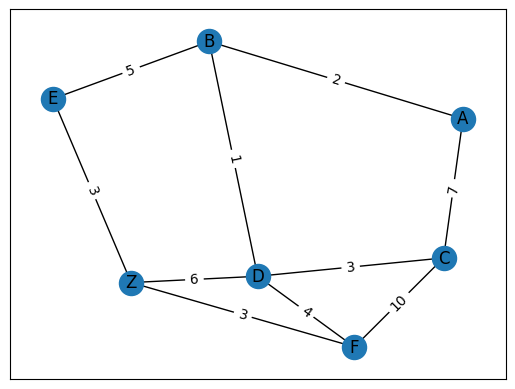

None


In [330]:
import matplotlib.pyplot as mp
import networkx as nx
import pandas as pn

G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F','Z']
G.add_nodes_from(nodes)
G.add_edge('A', 'B', weight = 2)
G.add_edge('A', 'C', weight = 7)
G.add_edge('B', 'D', weight = 1)
G.add_edge('B', 'E', weight = 5)
G.add_edge('C', 'D', weight = 3)
G.add_edge('C', 'F', weight = 10)
G.add_edge('D', 'F', weight = 4)
G.add_edge('D', 'Z', weight = 6)
G.add_edge('E', 'Z', weight = 3)
G.add_edge('F', 'Z', weight = 3)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos,style='solid')
nx.draw_networkx_labels(G,pos)
weight=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, weight)
mp.show()

y=nx.write_weighted_edgelist(G,'test')
print(y)

H=nx.to_pandas_adjacency(G)

In [333]:
edge_list=G.edges()
print(edge_list)
weight_list = []
for i, f, data in G.edges(data=True):
            weight_list.append(data['weight'])
print(weight_list)
node_count=len(G.nodes())
print(node_count)

adj_mat=nx.write_edgelist(G,'test')
print(adj_mat)

print(H)

[('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'F'), ('D', 'F'), ('D', 'Z'), ('E', 'Z'), ('F', 'Z')]
[2, 7, 1, 5, 3, 10, 4, 6, 3, 3]
7
None
     A    B     C    D    E     F    Z
A  0.0  2.0   7.0  0.0  0.0   0.0  0.0
B  2.0  0.0   0.0  1.0  5.0   0.0  0.0
C  7.0  0.0   0.0  3.0  0.0  10.0  0.0
D  0.0  1.0   3.0  0.0  0.0   4.0  6.0
E  0.0  5.0   0.0  0.0  0.0   0.0  3.0
F  0.0  0.0  10.0  4.0  0.0   0.0  3.0
Z  0.0  0.0   0.0  6.0  3.0   3.0  0.0


### Question 4:
The algorithm below first formats a string into all lowercase letters to allow comparison of all characters. If the string is only a signle character then it is by definition a palindrome, so no processing is required. If the string is longer, the function is recursively called to compare the outermost characters, progressing towards the centre character(s). If all characters can be successfully confirmed as matching then the function will return true, otherwise it will return false.

In [324]:
def isPalindrome(palindrome):
    #standardise the case to ensure all characters can be compared
    palindrome=palindrome.lower() 
    #identify a string of only one character or if the recursive algorithm has successfully reached the centre of the string
    if len(palindrome)<2: 
        return True
    if palindrome[0]==palindrome[len(palindrome)-1]:
        return isPalindrome(palindrome[1:len(palindrome)-1])
    #not a palindrome
    else:
        return False

An example of calling the function with a non-palindrome:

In [325]:
a="Horticulture"
if isPalindrome(a):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is not a palindrome.


With a palindrome:

In [326]:
b="Detartrated"
if isPalindrome(b):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is a palindrome.


With a user-inputted string, the input used was "Rotator":

In [328]:
c=input("Enter a word to check if it is a palindrome.")
if isPalindrome(c):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is not a palindrome.
